<a href="https://colab.research.google.com/github/isa-ulisboa/greends-pml/blob/main/ML_overview_with_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Course on Pratical Machine Learning

Masters in Green Data Science, ISA/ULisboa, 2022-2023

Instructor: Manuel Campagnolo mlc@isa.ulisboa.pt

## Introduction and some basic concepts in Machine Learning (ML)

In this course we are dealing with data sets of *labeled examples*. Examples can be scalar numbers, rows of tabular data, images, etc. For tabular data, we refer the to columns as *explanatory variables* (sometimes also called *independent* or *descriptive* variables).

Labels can be categorial, ordinal or continuous. Labels can be refered to as the *response variable* (or *dependent* variable). They are also called *targets*. Typically, we the problems are called:
1. *Regression problems*, when the labels are continuous. 
2. *Classification problems*, when the labels are categorial.

The distinction is not always clear. Some problems can be considered either as regression or classification problems. 

Given a ML problem, i.e. a set of labeled examples, the goal is to build a function $f$ that maps examples to labels or, in other words, that predicts the label from the example.

We call *predictions* or *predicted values* to the output of $f$, and *observations* or *actual values* to the actual labels.




## Models and parameters


More formally, if $E$ is the set of examples and $L$ is a set that includes the labels, then what we call the *model* is a family of functions $f_{\rm \bf w}$ that depends on a set of parameters ${\rm \bf w}$: $$f_{\rm \bf w}: E → L.$$

It can be more convenient to express the function as depending on the parameters ${\rm \bf w}$ as well as the example ${\rm \bf x}$. The model's predicted label $\hat{y}$ for the example ${\rm \bf x}$ is:

$$\hat{y}=f_{\rm \bf w}({\rm \bf x})= f({\rm \bf x}; {\rm \bf w}).$$

ML practicioners use an enormous variety of models, depending on the problem at hand and on the available computational resources to train the model. Models include convolucional neural networks (CNN) for image classification (resnet and other kind of CNNs), neural networks (NN) for classification of tabular data, linear regression models, decision and regression trees, random forest and other ensemble models, among many other models.

![picture](https://drive.google.com/uc?export=view&id=1rjcetay_O8EPd9mUHh4k1XFQIi84FfX2)

### Example of a simple model (simple linear regression)

Suppose that our examples are scalar numbers $x_1,\dots, x_n$ and the labels are continuous labels $y_1, \dots, y_n$. We call $x$ the explanatory variable and $y$ the response variable. 

Let's consider the simple linear regression model:
$f_{\rm a,b}(x)= a \, x + b.$

The model parameters are ${\rm \bf w}=(a,b)$ and the predicted values are given by$\\[1em]$ 
$$\hat{y}=f(x; {\rm a,b})=a\, x + b.$$

The observed or actual label values are the $y_1, \dots, y_n$, and the predicted label values are the $\hat{y}_1,\dots,\hat{y}_n$.



### Example of a simple model (quadratic regression)

In notebook [Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb](Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb), a similar simple example was discussed. The only difference was that the model $f_{\rm a,b,c}$ was quadratic instead of linear: 

$$f_{\rm a,b,c}(x)= f(x;a,b,c)= a \, x^2 + b \, x + c.$$

In the illustration below, the observed (actual) values are plotted in blue, and the values preditted by the model for a fixed set of parameters $a=3, b=2, c=1$ are plotted in red.

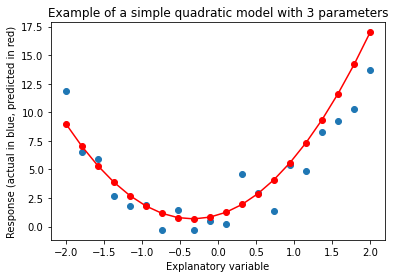

In [ ]:
# example from Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb
import numpy as np
import torch
import matplotlib.pyplot as plt
np.random.seed(42)
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)
# create synthetic examples (x) and labels (y), and calculate predictions
x = torch.linspace(-2, 2, steps=20)[:,None]
def f(x): return 3*x**2 + 2*x + 1
y = add_noise(f(x), 0.15, 1.5)
ypred=f(x)
# plot 
plt.scatter(x,y);
plt.scatter(x,ypred,color='red');
plt.title("Example of a simple quadratic model with 3 parameters")
plt.xlabel("Explanatory variable")
plt.ylabel("Response (actual in blue, predicted in red)")
plt.plot(x, f(x), 'red')
plt.show()

## Loss function

In ML, it is usual to call *loss* to the **dissimilarity** between actual and predicted label values for a *set* of labeled examples.

Let ${\rm \bf x}_1, \dots , {\rm \bf x}_n$ be a set of examples with labels $y_1, \dots , y_n$. Let $f_{\rm \bf w}$ be our model. Therefore, the predicted labels are 

$$\hat{y}_1=f_{\rm \bf w}({\rm \bf x}_1), \dots, \hat{y}_n=f_{\rm \bf w}({\rm \bf x}_n).$$

The loss over that set of examples is some dissimilarity measure between the actual labels $y_1, \dots , y_n$ and the predicted labels $\hat{y}_1, \dots , \hat{y}_n$.



### Example (simple linear regression)



For the linear regression example, the response variable is continuous. We wish to measure the dissimilarity between the set of actual label values $y_1, \dots , y_n$  and the set of values predicted by the model 
$f_{\rm a,b}(x)= a \, x + b$: 

$$\hat{y}_1=a\, x_1+ b, \dots, \hat{y}_n=a\, x_n+ b.$$

Since the response is continuous, it makes sense to use a function like:

1. Mean absolute error (MAE), given by $\sum_{i=1}^n |y_i-\hat{y}_i|$; or

2. Mean square error (MSE), given by $\frac{1}{n}\sum_{i=1}^n \left(y_i-\hat{y}_i\right)^2$.

### Example (quadratic regression)

In notebook [Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb](Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb), loss was given by MAE, i.e. $\sum_{i=1}^n |y_i-\hat{y}_i|$.

In [ ]:
def mae(preds, acts): return (torch.abs(preds-acts)).mean()

The notebook includes code to interactively change the parameter values and compute the MAE loss function for the data set.  

Function `partial` in the code below converts the 4-argument function $f(x,a,b,c)$ into a one argument function $f(x;a,b,c)=f_{\rm a,b,c}(x)$. Therefore, `mk_quad` corresponds to the one argument function $f_{\rm a,b,c}(x)$. Hence it can be passed to `plot_function` which expects a one argument function.



In [ ]:
from fastai.basics import * # necessary for partial
def quad(a, b, c, x): return a*x**2 + b*x + c
def mk_quad(a,b,c): return partial(quad, a,b,c)
def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)
# interactive plot
from ipywidgets import interact
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

## Dissimilarity measures to define *loss*


To define loss, we then need to choose an appropriate dissimilarity metric between a set of actual $y_1, \dots , y_n$ and predicted labels $\hat{y}_1, \dots , \hat{y}_n$. The choice depends on the type of problem, and while MAE or RMSE are adequate for *regression* problems, other dissimilarities are used for *classification* problems.




### Examples of loss functions for regression problems (MAE, MSE, Huber)



Above, two common loss functions for regression problems were listed

1. Mean absolute error (MAE), given by $\sum_{i=1}^n |y_i-\hat{y}_i|$; or

2. Mean square error (MSE), given by $\frac{1}{n}\sum_{i=1}^n \left(y_i-\hat{y}_i\right)^2$

In the one hand, MAE is not differentiable everywhere, which is an undesirable property for ML. On the other hand, MSE penalizes too much large differences between actual and predicted values, which means that a single example can constraint strongly the solution. 

An alternative is called the Huber loss function, which is differentiable everywhere, and behaves like MSE near the origin and like MAE for large $|y_i-\hat{y}_i|$.


### Example of loss functions for classification problems (cross-entropy)

Classification problems have categorical labels. Therefore, the model predictions should return the most likely label for each example. 

While in regression, the model's output is typically an unbounded response variable (for instance, it is $f(x;a,b) = a\, x + b$ in simple linear regression), for classification problems, it is more convenient to have:
1. one output per label;
2. each output being a value between 0 and 1 that can be interpreted as the probability of the label.

![picture](https://drive.google.com/uc?export=view&id=1iD519g8QbBmOGp9SiOQsIneJnWg53SMQ)


Therefore, it is usual to have a model that outputs $f_1({\rm \bf x};{\rm \bf w_1}), \dots , f_k({\rm \bf x};{\rm \bf w_k})$ for each of the $k$ possible labels, and an additional model component that converts those *raw* outputs into probability-like values for the labels.

You saw that kind of probabilistic output when you trained and deployed an image classifier in notebook [Lesson2_edited_book_02_production.ipynb](Lesson2_edited_book_02_production.ipynb). When you did predict the label for a new example with

`learn_inf.predict('images/grizzly.jpg')`,

you got a vector of estimated probabilities like the following:

`('grizzly', tensor(1), tensor([9.0767e-06, 9.9999e-01, 1.5748e-07]))`.

#### Softmax 

The unormalized model outputs $f_1, \dots, f_k$ are called *logits* or *raw* outputs. Each $z_i=f_i({\rm \bf x};{\rm \bf w_i})$ is converted into a [0,1] value by the *softmax* function:

$$S(z)=\frac{\exp(z)}{\sum_{i=1}^k \exp(z_i)} ∈ [0,1].$$

After that transformation, the classification model's output is a vector of values $(p_1,\dots,p_k)$, with $p_i \ge 0$ and $\sum p_i=1$ that can be interpreted as probabilities, and the predicted label is the one with highest $p$.

While in the regression problem the loss is a dissimilarity between the actual labels $y_1,\dots,y_n$ and the predicted labels $\hat{y}_1,\dots,\hat{y}_n$ for the set with $n$ examples, in classification with *softmax* the loss is then a dissimilarity between the actual labels $y_1,\dots,y_n$ and the $n$ probability vectors $(p_1,\dots,p_k)$.

The most common *loss* function for classification is called *cross-entropy*. Notebook [Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb](Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb) creates the learner with:

`learn = vision_learner(dls, resnet18, metrics=error_rate)`

`vision_learner` allows to explicitely define the loss function  with the argument `loss_func`. Since it is not explicitely defined in the code above, we can check the default which is stored in property `loss_func`:

`learn.loss_func` 

which returns `FlattenedLoss of CrossEntropyLoss()`. This `fastai` loss is described in the Pytorch documentation as the `nn.CrossEntropyLoss` class  [https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html). Hence, the loss function that is applied in the example in the notebook is  `torch.nn.CrossEntropyLoss` that computes the cross entropy loss between input logits and target. 

#### Cross-entropy

So, what is the *loss* you see in the output when you train an image classifier in notebook [Lesson2_edited_book_02_production.ipynb](Lesson2_edited_book_02_production.ipynb)?

> epoch 	train_loss 	valid_loss 	error_rate 	time

>     0   1.174910    0.043982    0.009091    00:34


Suppose that your model (`resnet`) was trained to classify photos of bears into *black*, *grizzly* and *teddy* as in [Lesson2_edited_book_02_production.ipynb](Lesson2_edited_book_02_production.ipynb). The last layer of the model outputs the values of three functions $f_1, f_2, f_3$, where $f_1$ is associated to *black*, $f_2$ is associated to *grizzly* and $f_3$ is associated to *teddy*. The values $(z_1,z_2,z_3)$ of the function for some input and for your trained model are the so-called *logits* or *raw* outputs. 

The code below creates an example of the outputs for a *batch* of 4 examples. In the matrix below each row is an example and each column is a label. Consider that column 1 is for *black*, column 2 for *grizzly* and column 3 for *teddy*.

In [ ]:
import torch
raws=torch.tensor([[4.5,2.1,0.2],
                   [1.3,8.3,0.8],
                   [1.2,1.5,4.2],
                   [5.1,0.4,2.3]])
raws

tensor([[4.5000, 2.1000, 0.2000],
        [1.3000, 8.3000, 0.8000],
        [1.2000, 1.5000, 4.2000],
        [5.1000, 0.4000, 2.3000]])

Looking at the tensor above, it looks like the first and fourth examples have a larger likelihood of being photos of *black* bears, while the second example is more likely a *grizzly* bear and the third one seems to be a *teddy* bear photo. Let's apply *softmax* to convert the raw outputs into probability-like values.

In [ ]:
 softs = raws.softmax(dim=1)
 softs

tensor([[9.0556e-01, 8.2151e-02, 1.2287e-02],
        [9.1055e-04, 9.9854e-01, 5.5228e-04],
        [4.4572e-02, 6.0166e-02, 8.9526e-01],
        [9.3466e-01, 8.5010e-03, 5.6837e-02]])

It is clear that the softmax rule did amplify the difference in values for each example. In each row there is one value close to 1 and the remainder values are close to 0. For each example, *cross-entropy* compares the target distribution with the probability distribution returned by *softmax*. For instance, for the first row we have:

In [ ]:
target=torch.zeros(1,3)
target[0,softs[0,:].argmax(axis=0)]=1
print('probability distribution (p): ', softs[0,:])
print('target distribution      (t):', target)

probability distribution (p):  tensor([0.9056, 0.0822, 0.0123])
target distribution      (t): tensor([[1., 0., 0.]])


Cross-entropy loss measures the dissimilarity between the probability distribution returned by *softmax* $(p_1,p_2,p_3)$ and the target distribution $(t_1,t_2,t_3)$ for the $i$-th example with the expression, and takes values between 0 (optimal value associated to minimum uncertainty) and 1 (maximum value associated to maximum uncertainty, i.e. all probabilities are equal):

$$L_i=-\left( t_1 \, \log(p_1) + t_2 \, \log(p_2) + t_3 \, \log(p_3) \right) \in [0,1].$$

In the expression above, we suppose that the probabilities are non zero. 
For the whole batch of $n$ examples, the cross-entropy loss is given by the average of the $n$ individual loss values:

$$L=\frac{1}{n} \left( L_1+L_2+ \dots,L_n\right).$$

This can be computed with `nn.CrossEntropyLoss()` as below:

In [ ]:
import torch.nn as nn
# Create target distributions
n,k=raws.shape
target=torch.zeros(n,k)
for i in range(n): target[i,softs.argmax(axis=1)[i]]=1
print(target)
# compute loss
loss = nn.CrossEntropyLoss()
output = loss(raws, target)
print('Cross Entropy Loss: ', output)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]])
Cross Entropy Loss:  tensor(0.0697)



## ML as an optimization problem



Now, we can define a ML problem as a optimization problem. Given

1.  a set of examples  ${\rm \bf x}_1, \dots , {\rm \bf x}_n$  with labels $y_1, \dots , y_n$
2. a model $f_{\rm \bf w}$
3. a *loss* function $L$

the goal is to determine the optimal set of parameters ${\rm \bf w}$ that minimize the loss $\mathcal{L}$ over that set of examples.

### Training and validation sets

To prevent *overfitting* the parameters to the set of examples, the *loss* is computed over an independent set of examples which is called the *validation* set. In general, the example data set with $N$ examples is partitioned into a subset with, say $0.2 \times N$ examples for validation and $0.8 \times N$ examples for training like we saw in [Lesson2_edited_book_02_production.ipynb](Lesson2_edited_book_02_production.ipynb):

    bears = DataBlock(
        blocks=(ImageBlock, CategoryBlock), 
        get_items=get_image_files, 
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        item_tfms=Resize(128))

where `RandomSplitter(valid_pct=0.2, seed=42)` indicates that 20% of the examples are used for validation.

The training data set is used to search for the optimal set of weights for the model.



Examples
1. Quadratic function
Xs are just scalars
Y are continuous (regression problem)
F_w is f(x;a,b,c)
Loss is mãe or rmse
In this case the best set of weights can be determined analytacally
In alternative one can use gradient descent

2. Perceptron (no sigmoid) = mlr
X are vectors , after preprocessing
Y are 0 or 1 (regression or classification)
Fw is S(X1 w1+....)
Loss is ...
In this case the problem 8s equivalent to least square mlr, and has an analital solution

3. Perceptron with sigmoid output


4 FC nn with hidden layers



## Assessing ML performance

Notebook [https://github.com/isa-ulisboa/greends-pml/blob/main/Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb](https://github.com/isa-ulisboa/greends-pml/blob/main/Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb) does it with

`learn = vision_learner(dls, resnet18, metrics=error_rate)`

where `dls` is a `DataLoaders` object with the input data, `resnet18` is a deep CNN model, and `metrics=error_rate` determines the *loss* function.  In that case, `error_rate` returns the proportion of mismatches between the set of actual labels $y_1, \dots , y_n$ and the set of predicted labels $\hat{y}_1, \dots , \hat{y}_n$.


Change? Is this about error_rate and not loss?
A large list of dissimilarity metrics for regression and classification problem can be found at
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics. The package `fastai` provides many similarity/dissimilarity metrics, including all metrics from `scikit-learn`. The documentation is available at https://docs.fast.ai/metrics.html.